**数据集简介**
<br>
主要包括3类指标:
<br>
<ul>
    <li>汽车的各种特性
    <li>保险风险评级:(-3,-2,-1,0,1,2,3)
    <li>每辆保险车辆年平均相对损失支付.
</ul>

**类别属性**
<ul>
    <li>make:汽车的商标(爽迪,宝马。。。)
    <li>fuel-type:汽油还是天然气
    <li>aspiration:涡轮
    <li>num- of-doors:两门还是四门
    <li>body-style:硬顶车、轿车、菰背车、散篷车
    <li>drive- wheels:驱动轮
    <li>engine-location:发动机位置
    <li>engine-type:发动机类型
    <li>num- of-cylinders:几个气缸
    <li>fuel- system:燃油系统
</ul>

**连续指标**
<ul>
<li>bore: continuous from 2.54 to 3.94.
<li>stroke: continuous from 2.07 to 4.17.
<li>compression-ratio: continuous from 7 to 23.
<li>horsepower: continuous from 48 to 288.
<li>peak-rpm: continuous from 4150 to 6600.
<li>city-mpg: continuous from 13 to 49.
<li>highway-mpg: continuous from 16 to 54.
<li>price: continuous from 5118 to 45400.
</ul>

In [1]:
# loading packages
import numpy as np
import pandas as pd
from pandas import datetime
import warnings  # 忽略普通警告，不打印太多东西
warnings.filterwarnings('ignore')

#data visualization and missing values
import matplotlib.pyplot as plt
import seaborn as sns #基于Matplotlib，更高级的
import missingno as msno  #提供了一个灵活且易于使用的缺失数据可视化和实用程序的小工具集
%matplotlib inline

#stats
from statsmodels.distributions.empirical_distribution import ECDF #对许多不同统计模型估计的类和函数，可以进行统计测试和统计数据的探索。
from sklearn.metrics import mean_squared_error,r2_score #常用的机器学习方法，包括回归(Regression)、降维(Dimensionality Reduction)、分类(Classfication)、聚类(Clustering)等方法

#mechine learning 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso,LassoCV
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import RandomForestRegressor
seed = 123  # 随机种子，使随机策略结果一致，不指定则每次随机结果不一样

#import data
data = pd.read_csv('auto_data.csv', na_values='?')
data.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compress-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg',
       'price', 'output'],
      dtype='object')

In [2]:
data.dtypes

symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compress-ratio       float64
horsepower             int64
peak-rpm               int64
city-mpg               int64
highway-mpg            int64
price                  int64
output                object
dtype: object

In [3]:
print('In total:', data.shape)  # 205条数据，26个特征，NaN表示为缺失值
data.head(5)

In total: (205, 27)


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compress-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,output
0,3,164,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495,no
1,3,164,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500,no
2,1,164,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500,no
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950,no
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450,no


In [4]:
data.describe()  #查看数据描述，count统计、mean均值、std标准差、min最小值、50%中位数、max最大值

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compress-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,128.965854,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.324878,3.253366,10.142537,106.048780,5131.463415,25.219512,30.751220,13293.331707
std,1.245307,39.421600,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273049,0.313937,3.972040,43.468803,480.933330,6.542142,6.886443,8115.709527
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5000.000000
25%,0.000000,95.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.130000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,122.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,158.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,120.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


### 缺失值填充

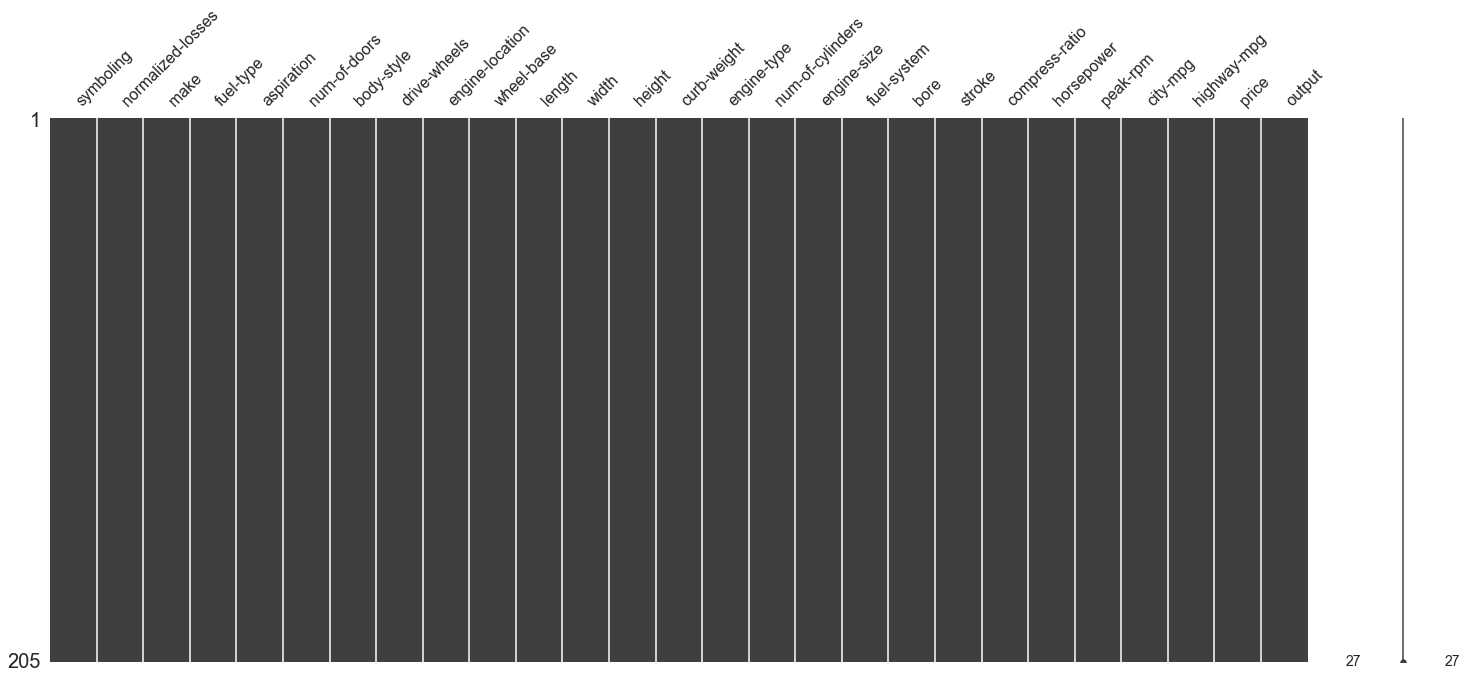

In [5]:
sns.set(style='ticks')  #指定风格
msno.matrix(data)  #查看缺少情况

这里是没缺失值的，你可以手动删掉一些数据造成缺少的情况

In [6]:
#缺失值填充（也可以删掉，但是我们数据不多删掉就更少了）
data[pd.isnull(data['normalized-losses'])].head()  #查看某列缺失的情况，这里没缺少，我们假设其缺失

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compress-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,output


(array([13., 24., 36., 26., 16., 17., 24., 25.,  7., 12.,  0.,  0.,  1.,
         4.]), array([ 65.        ,  78.64285714,  92.28571429, 105.92857143,
        119.57142857, 133.21428571, 146.85714286, 160.5       ,
        174.14285714, 187.78571429, 201.42857143, 215.07142857,
        228.71428571, 242.35714286, 256.        ]), <a list of 14 Patch objects>)

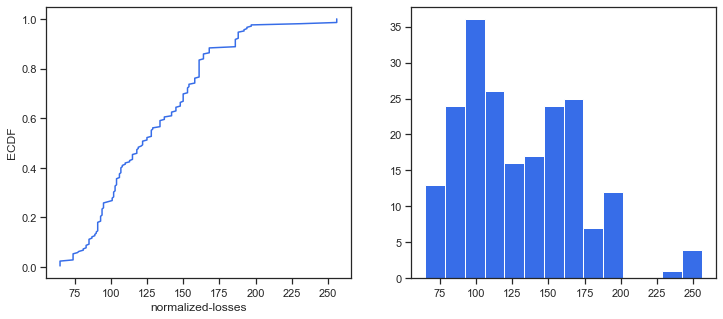

In [7]:
plt.figure(figsize=(12,5))
c = '#376DE8'  # 指定颜色

#ECDF，画出占比
plt.subplot(121)  # 分两边，画在左边
cdf = ECDF(data['normalized-losses'])
plt.plot(cdf.x, cdf.y,label='statmodels',color=c)
plt.xlabel('normalized-losses')
plt.ylabel('ECDF')

#overall distribution，画出占比
plt.subplot(122)  # 分两边，画在右边
plt.hist(data['normalized-losses'].dropna(),
        bins=int(np.sqrt(len(data['normalized-losses']))),
        color = c)

可以发现**80%的 normalized losses是低于200**并且绝大多数低于125。
<br>
<br>
一个基本的想法就是用中位数来进行填充,但是我们得来想一想,这个特征(保险损失值)跟哪些因素可能有关呢？应该是保险的情况吧,所以我们可以分组来进行填充这样会更精确一些。
<br><br>
首先来看一下对于不同保险情况的统计指标：

In [8]:
data.groupby('symboling')['normalized-losses'].describe()  #查看风险等级

,count,mean,std,min,25%,50%,75%,max
symboling,,,,,,,,
-2,3.0,103.000000,0.000000,103.0,103.0,103.0,103.00,103.0
-1,22.0,86.136364,17.715464,65.0,74.0,91.5,95.00,137.0
0,67.0,128.776119,44.511429,77.0,91.0,110.0,161.00,256.0
1,54.0,132.037037,29.599823,74.0,108.5,128.0,154.00,231.0
2,32.0,128.000000,31.285367,83.0,101.5,134.0,158.75,192.0
3,27.0,162.222222,34.033166,74.0,150.0,153.0,186.00,256.0


这样，我们可以对应不同的组，去填充对应的均值
<br><br>如-2对应着103，-1对应86

In [9]:
data = data.dropna(subset=['price','bore','stroke'])  #对缺失值少量的可以之间删除
#对于大量缺失情况的，补相关特征不同组对应的均值
data['normalized-losses'] = data.groupby('symboling')['normalized-losses'].transform(lambda x:x.fillna(x.mean()))

print('In total:', data.shape)  # 205条数据，26个特征，NaN表示为缺失值
data.head(5)

In total: (205, 27)


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compress-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,output
0,3,164,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495,no
1,3,164,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500,no
2,1,164,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500,no
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950,no
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450,no


### 特征相关性

In [10]:
cormatrix = data.corr()
cormatrix

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compress-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
symboling,1.000000,0.389010,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.160225,-0.020132,-0.178515,0.070421,0.273125,-0.035823,0.034606,-0.079290
normalized-losses,0.389010,1.000000,0.008200,0.152832,0.200870,-0.287893,0.218460,0.237114,0.047391,0.070319,-0.073362,0.370384,0.234384,-0.321647,-0.270414,0.313716
wheel-base,-0.531954,0.008200,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.495108,0.164549,0.249786,0.301696,-0.363355,-0.470414,-0.544082,0.572348
length,-0.357612,0.152832,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.608905,0.132076,0.158414,0.521192,-0.279406,-0.670909,-0.704662,0.680804
width,-0.232919,0.200870,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.556374,0.183379,0.181129,0.596251,-0.214240,-0.642704,-0.677218,0.765788
height,-0.541038,-0.287893,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.199995,-0.044176,0.261214,-0.114968,-0.322525,-0.048640,-0.107358,0.113942
curb-weight,-0.227691,0.218460,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648219,0.170425,0.151362,0.679865,-0.264976,-0.757414,-0.797465,0.836802
engine-size,-0.105790,0.237114,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.602516,0.211477,0.028971,0.742119,-0.241031,-0.653658,-0.677470,0.871189
bore,-0.160225,0.047391,0.495108,0.608905,0.556374,0.199995,0.648219,0.602516,1.000000,-0.049492,0.008511,0.537543,-0.276942,-0.556570,-0.562065,0.550994
stroke,-0.020132,0.070319,0.164549,0.132076,0.183379,-0.044176,0.170425,0.211477,-0.049492,1.000000,0.187134,0.164722,-0.051970,-0.033609,-0.036502,0.080531


得到特征之间的特征相关性，值越大表示两特征间相关越大

In [11]:
#返回函数的上三角矩阵，把对角上的置0，让他们不是最高
cormatrix *= np.tri(*cormatrix.values.shape, k=-1).T 
cormatrix

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compress-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
symboling,0.0,0.38901,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.160225,-0.020132,-0.178515,0.070421,0.273125,-0.035823,0.034606,-0.079290
normalized-losses,0.0,0.00000,0.008200,0.152832,0.200870,-0.287893,0.218460,0.237114,0.047391,0.070319,-0.073362,0.370384,0.234384,-0.321647,-0.270414,0.313716
wheel-base,-0.0,0.00000,0.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.495108,0.164549,0.249786,0.301696,-0.363355,-0.470414,-0.544082,0.572348
length,-0.0,0.00000,0.000000,0.000000,0.841118,0.491029,0.877728,0.683360,0.608905,0.132076,0.158414,0.521192,-0.279406,-0.670909,-0.704662,0.680804
width,-0.0,0.00000,0.000000,0.000000,0.000000,0.279210,0.867032,0.735433,0.556374,0.183379,0.181129,0.596251,-0.214240,-0.642704,-0.677218,0.765788
height,-0.0,-0.00000,0.000000,0.000000,0.000000,0.000000,0.295572,0.067149,0.199995,-0.044176,0.261214,-0.114968,-0.322525,-0.048640,-0.107358,0.113942
curb-weight,-0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.850594,0.648219,0.170425,0.151362,0.679865,-0.264976,-0.757414,-0.797465,0.836802
engine-size,-0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.602516,0.211477,0.028971,0.742119,-0.241031,-0.653658,-0.677470,0.871189
bore,-0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.049492,0.008511,0.537543,-0.276942,-0.556570,-0.562065,0.550994
stroke,-0.0,0.00000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.187134,0.164722,-0.051970,-0.033609,-0.036502,0.080531


因为对角是重复的，之间把对角及下面的部分置0

In [12]:
cormatrix = cormatrix.stack()  #一列一列的拿出来
cormatrix

symboling          symboling            0.000000
                   normalized-losses    0.389010
                   wheel-base          -0.531954
                   length              -0.357612
                   width               -0.232919
                   height              -0.541038
                   curb-weight         -0.227691
                   engine-size         -0.105790
                   bore                -0.160225
                   stroke              -0.020132
                   compress-ratio      -0.178515
                   horsepower           0.070421
                   peak-rpm             0.273125
                   city-mpg            -0.035823
                   highway-mpg          0.034606
                   price               -0.079290
normalized-losses  symboling            0.000000
                   normalized-losses    0.000000
                   wheel-base           0.008200
                   length               0.152832
                   w

In [13]:
#按大小排序
cormatrix = cormatrix.reindex(
    cormatrix.abs().sort_values(ascending=False).index).reset_index()
cormatrix

,level_0,level_1,0
0,city-mpg,highway-mpg,0.971337
1,length,curb-weight,0.877728
2,wheel-base,length,0.874587
3,engine-size,price,0.871189
4,width,curb-weight,0.867032
5,curb-weight,engine-size,0.850594
6,length,width,0.841118
7,curb-weight,price,0.836802
8,curb-weight,highway-mpg,-0.797465
9,wheel-base,width,0.795144


In [14]:
cormatrix.columns = ['FirstFeat','SecondFeat','Correlation']  #重新指定列名，看的更明了
cormatrix.head(10)

,FirstFeat,SecondFeat,Correlation
0,city-mpg,highway-mpg,0.971337
1,length,curb-weight,0.877728
2,wheel-base,length,0.874587
3,engine-size,price,0.871189
4,width,curb-weight,0.867032
5,curb-weight,engine-size,0.850594
6,length,width,0.841118
7,curb-weight,price,0.836802
8,curb-weight,highway-mpg,-0.797465
9,wheel-base,width,0.795144


FirstFeat和SecondFeat表示两个特征，Correlation表示相关系数
<br>
可以看到第一行的特征相关性极大，那么可以只选择其中一个特征即可

比如其中的length长、width宽、height高的相关性也很高，我们是不是可以用一个特征去表示；
<br>那就是体积

In [15]:
data['volume'] = data.length * data.width * data.height  #得到体积

data.drop(['length','width','height',
           'city-mpg','curb-weight'],  #删掉不必要的
         axis=1,inplace=True)

In [16]:
data.columns  #查看修改后的情况

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'engine-type', 'num-of-cylinders', 'engine-size',
       'fuel-system', 'bore', 'stroke', 'compress-ratio', 'horsepower',
       'peak-rpm', 'highway-mpg', 'price', 'output', 'volume'],
      dtype='object')

画出来

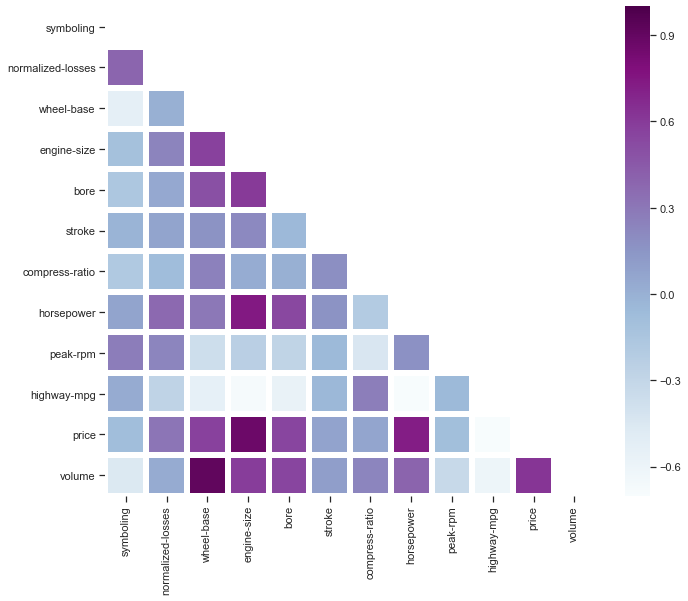

In [17]:
corr_all = data.corr()  #获取相关系数

mask = np.zeros_like(corr_all, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True  #要下半部数据

f, ax = plt.subplots(figsize=(11,9))  #设置画布

#热力图
sns.heatmap(corr_all, mask=mask,
           square=True, linewidths=5, ax=ax, cmap='BuPu')
plt.show()

与price相关程度大的有wheel-base、enginine-size等

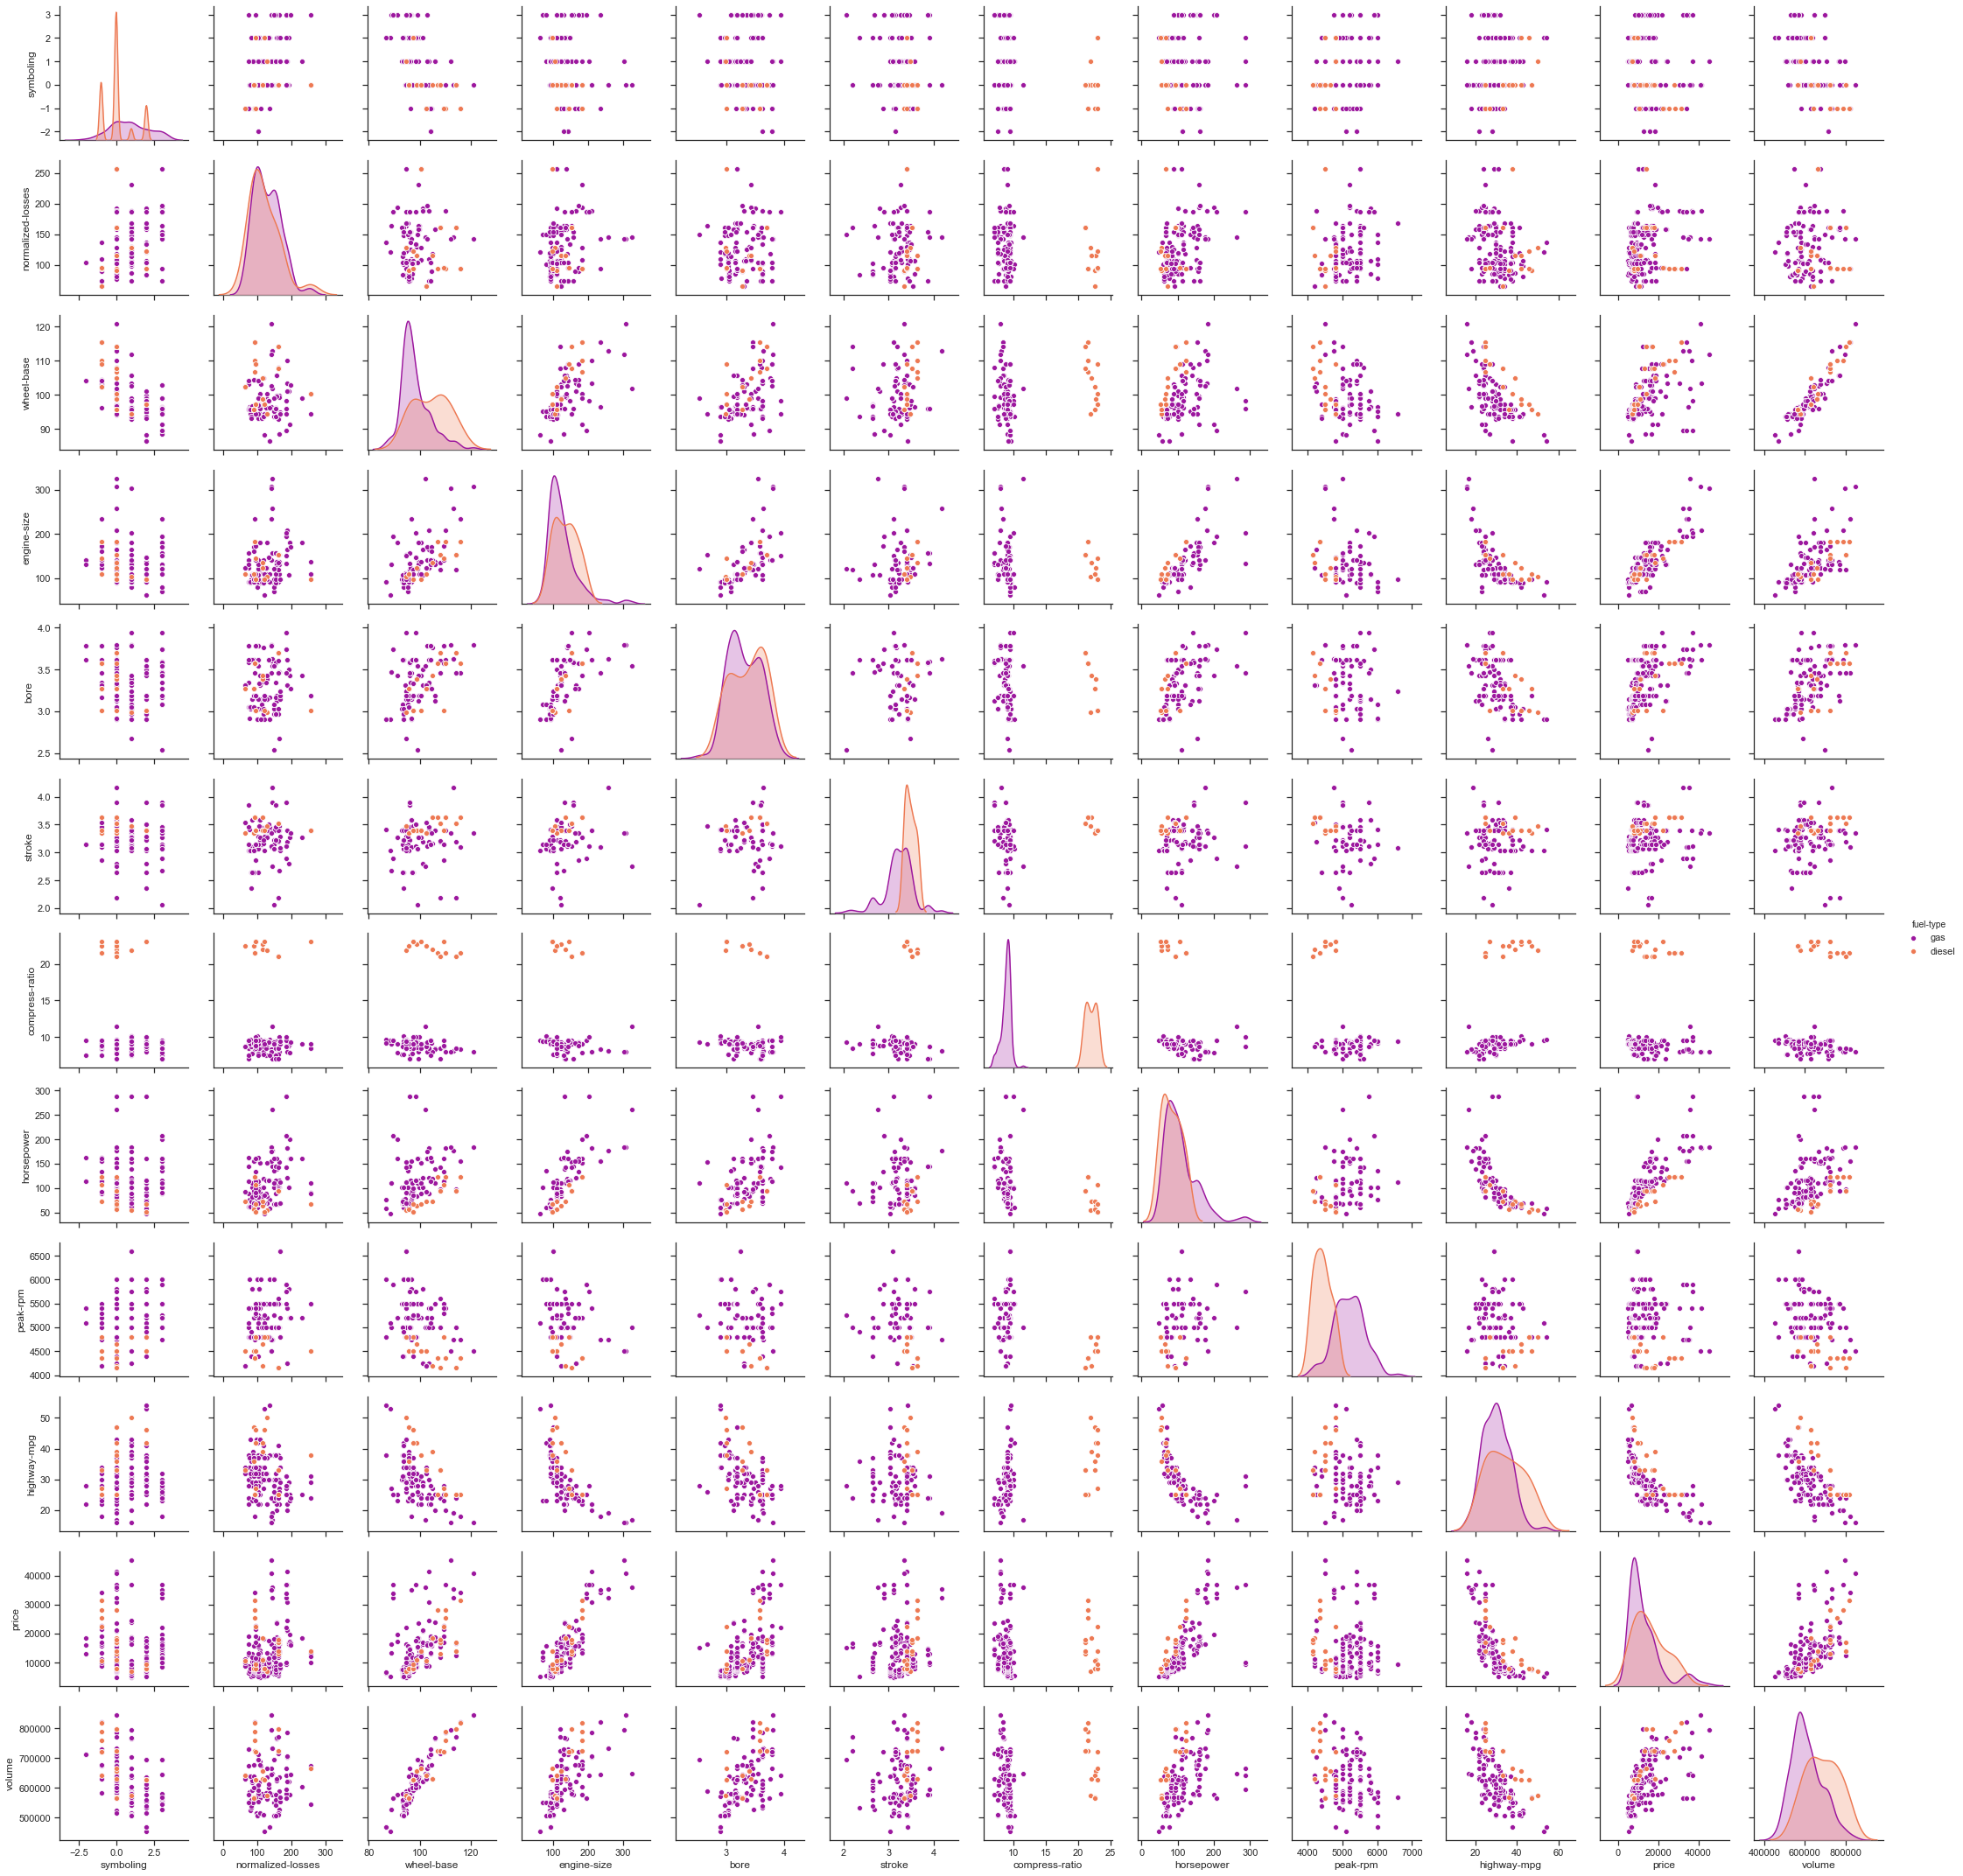

In [18]:
sns.pairplot(data, hue='fuel-type', palette='plasma')
#对角线是密度图，其它为散点图，
#以fuel-type区分两种颜色，燃油车还是燃气车，这个可以按照自己的想法改
#palette是颜色版

再细看，价格和马力之间的关系

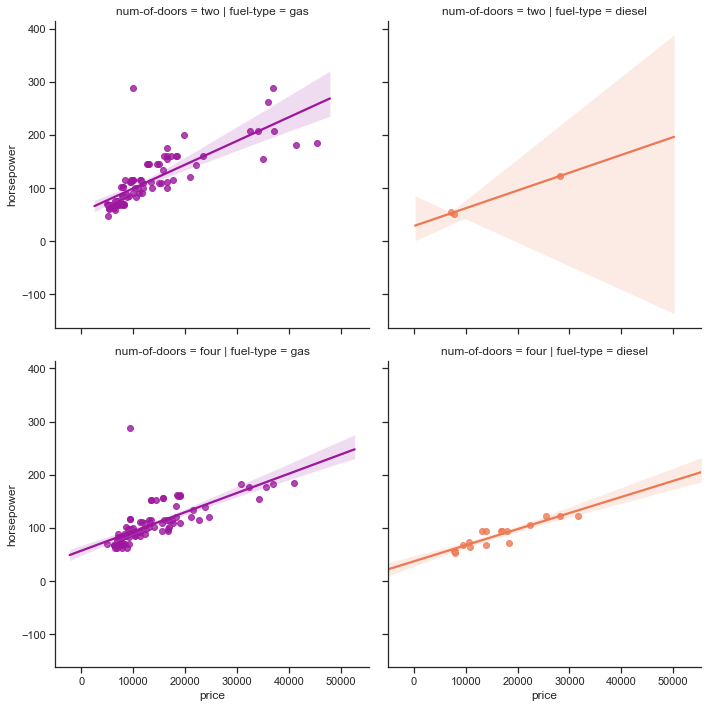

In [19]:
sns.lmplot('price','horsepower',  #指定横纵轴price,horsepower
           data,  #指定数据
           hue='fuel-type',  #指定子图的区分特征
           col='fuel-type',  #指定行，可以理解为条件1
           row='num-of-doors',  #指定列，可以理解为条件2
           palette='plasma',
          fit_reg=True)
#如第一个图是num-of-doors=two，fuel-type=gas在价格和马力之间的关系
#可以看到价格和马力之间的关系还是很强的

### 预处理
如果一个特征的方差比其它的大很多，那么它可能支配目标函数，使估计者不能像预期的那样正确的从其它特征中学习。这就是为什么要坐数据缩放

对连续值进行标准化，让数据落在大致的区域范围内，而不是差异非常大
<br>
你也可以尝试某个值不做归一化，后续的特征重要性可以看到不做归一化的重要性极高

In [71]:
target = data.price  #预测标签

regressors = [x for x in data.columns if x not in ['price']]  #训练数据
features = data.loc[:, regressors]

num = ['symboling','normalized-losses','volume',
       'horsepower','wheel-base','bore','engine-size',
       'stroke','compress-ratio','peak-rpm','highway-mpg']  #获取连续值特征列

#标准化
standard_scaler = StandardScaler()
features[num] = standard_scaler.fit_transform(features[num])

features.head()  #数值已经标准化

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compress-ratio,horsepower,peak-rpm,highway-mpg,output,volume
0,1.743470,0.89088,alfa-romero,gas,std,two,convertible,rwd,front,-1.690772,...,0.074449,mpfi,0.532789,-1.830840,-0.288349,0.114182,-0.27402,-0.546059,no,-1.144195
1,1.743470,0.89088,alfa-romero,gas,std,two,convertible,rwd,front,-1.690772,...,0.074449,mpfi,0.532789,-1.830840,-0.288349,0.114182,-0.27402,-0.546059,no,-1.144195
2,0.133509,0.89088,alfa-romero,gas,std,two,hatchback,rwd,front,-0.708596,...,0.604046,mpfi,-2.367552,0.691744,-0.288349,1.105818,-0.27402,-0.691627,no,-0.392670
3,0.938490,0.89088,audi,gas,std,four,sedan,fwd,front,0.173698,...,-0.431076,mpfi,-0.495180,0.468224,-0.035973,-0.093370,0.76817,-0.109354,no,0.203076
4,0.938490,0.89088,audi,gas,std,four,sedan,4wd,front,0.107110,...,0.218885,mpfi,-0.495180,0.468224,-0.540725,0.206427,0.76817,-1.273900,no,0.227271


In [72]:
# features['highway-mpg']

**对分类属性进行one-hot编码**
<br>
比如fuel-type里面只有gas和diesel，机器是不认识的需要转化成0/1类型的

In [73]:
classes = ['make','fuel-type','aspiration','engine-type',
           'num-of-doors','body-style','drive-wheels','output',
           'engine-location','num-of-cylinders','fuel-system']  #获取所需特征列

dummies = pd.get_dummies(features[classes])  #进行one-hot
#加入one-hot后的数值，并去掉原有的字符串类型的数据
features = features.join(dummies).drop(classes, axis=1)

print('In total:', features.shape)
features.head(5)  #可以看到结果已经没有字符串类型的数据了，且新增的只有0或者1

In total: (205, 73)


,symboling,normalized-losses,wheel-base,engine-size,bore,stroke,compress-ratio,horsepower,peak-rpm,highway-mpg,...,num-of-cylinders_twelve,num-of-cylinders_two,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,1.743470,0.89088,-1.690772,0.074449,0.532789,-1.830840,-0.288349,0.114182,-0.27402,-0.546059,...,0,0,0,0,0,0,0,1,0,0
1,1.743470,0.89088,-1.690772,0.074449,0.532789,-1.830840,-0.288349,0.114182,-0.27402,-0.546059,...,0,0,0,0,0,0,0,1,0,0
2,0.133509,0.89088,-0.708596,0.604046,-2.367552,0.691744,-0.288349,1.105818,-0.27402,-0.691627,...,0,0,0,0,0,0,0,1,0,0
3,0.938490,0.89088,0.173698,-0.431076,-0.495180,0.468224,-0.035973,-0.093370,0.76817,-0.109354,...,0,0,0,0,0,0,0,1,0,0
4,0.938490,0.89088,0.107110,0.218885,-0.495180,0.468224,-0.540725,0.206427,0.76817,-1.273900,...,0,0,0,0,0,0,0,1,0,0


**划分数据集**
划分成训练集和验证集，训练出来的结果在验证集上测试效果

In [74]:
# tain为训练集，test为测试集
#test_size切分比例，训练占总数据0.7，测试0.3，random_state随机切分的种子
X_train, X_test, y_train, y_test = train_test_split(features,target,
                                                   test_size=0.3,
                                                   random_state=seed)
print("Train", X_train.shape, "Test:", X_test.shape)

Train (143, 73) Test: (62, 73)


### 回归求解
Lass回归，多加了一个绝对值项来惩罚过大的系数，alphas=0就是最小二乘

为什么需要惩罚项：
<br>
假设有数据`x=[1,1,1]`,` w[1/3,1/3,1/3]`,`c[1/3,0,0]`
<br>
计算x和w，数据分别相乘并相加，结果为x1w1+x2w2+x3w3 = 1/3+1/3+1/3 = 1，
<br>
而x和c只有第一个数据点和w相同，后面两个为0，结果为1/3；
<br>
<br>
x和w的3个数据点结果平稳，而x和c的结果非常不平稳，
<br>
我们希望的结果是x和w这种每个结果数据点都比较稳定的。

**惩罚项**
因为0乘以任何结果都为0，我们引入惩罚项：
<br>
原本我们的计算是 真实的y - 预测的y得到值越小越好
<br>
现在是loss = (真实的y - 预测的y) + λ(w) 越小越好

CV results: 0.9297963022389589 53.35375452969131


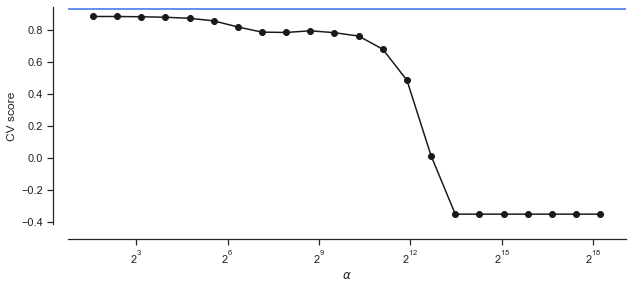

In [90]:
alphas = 3. ** np.arange(2,12)  #自选惩罚项参数，现在是手动调，也有自动包
scores = np.empty_like(alphas)  #计算不同参数的不同得分

#第一种方法
for i, a in enumerate(alphas):
    lasso = Lasso(random_state=seed)  #指定Lasso模型
    lasso.set_params(alpha=a)  #指定惩罚力度
    lasso.fit(X_train, y_train)  #训练
    scores[i] = lasso.score(X_test, y_test)  #预测
    
#第二种方法，交叉验证，训练集再切分几分交叉训练并自验证，最后再拿预测集预测
 #cv=10，平均切分10次，即10份，每次训练9份拿另外的1份验证
lassocv = LassoCV(cv=10, random_state=seed)
lassocv.fit(features, target)  #训练
lassocv_score = lassocv.score(features, target)  #预测
lassocv_alpha = lassocv.alpha_  #获取alpha值

plt.figure(figsize=(10,4))
plt.plot(alphas, scores, '-ko')
plt.axhline(lassocv_score, color=c)
plt.xlabel(r'$\alpha$')
plt.ylabel('CV score')
plt.xscale('log', basex=2)
sns.despine(offset=15)

#查看不同alpha值下的得分
print('CV results:', lassocv_score, lassocv_alpha)

**查看特征重要性**

Lasso picked28features and eliminated the other45features.


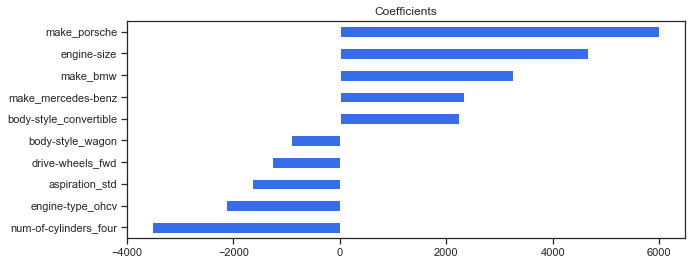

In [76]:
coefs = pd.Series(lassocv.coef_, index=features.columns)

print("Lasso picked" + str(sum(coefs != 0)) + \
      "features and eliminated the other"+ \
     str(sum(coefs == 0)) + "features.")

#只看头5个和尾5个
coefs = pd.concat([coefs.sort_values().head(5), coefs.sort_values().tail(5)])

plt.figure(figsize=(10,4))
coefs.plot(kind="barh", color=c)
plt.title("Coefficients")
plt.show()

In [85]:
#进行训练和预测，并检验得分，得分越高表明模型越好
#alpha选取我们手动找到的
model_l1 = LassoCV(alphas=alphas,cv=10,random_state=seed).fit(X_train,y_train)
y_pred_l1 = model_l1.predict(X_test)

model_l1.score(X_test,y_test)

0.870697563184287

**画出残差点**
<br>
预测值和真实值之间的差异，y轴真实值和预测值之间的差异，x轴为预测值
<br>
差异在0左右是最好的

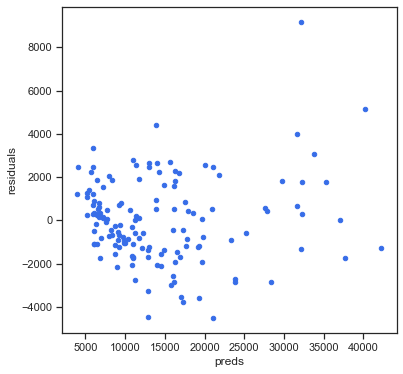

In [93]:
plt.rcParams['figure.figsize'] = (6.0,6.0)

preds = pd.DataFrame({'preds':model_l1.predict(X_train), 'true':y_train})
preds['residuals'] = preds['true'] - preds['preds']
preds.plot(x='preds', y='residuals', kind='scatter', color=c)

常用的评测方法：
<br>
MSE均方误差（越小越好）
<br>R2决定系数（0-1之间，越大表示模型拟合效果越好）

In [94]:
def MSE(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    print("MSE: %2.3f" % mse)
    return mse

def R2(y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    print("R2: %2.3f" % r2)
    return r2

MSE(y_test, y_pred_l1);R2(y_test, y_pred_l1);

MSE: 4232851.141
R2: 0.871


In [95]:
# 打印真实值和预测值
p = {'true':list(y_test),
    'predicted':pd.Series(y_pred_l1)
    }
pd.DataFrame(p).head()

,true,predicted
0,9279,8053.973904
1,35056,32509.124398
2,17075,19477.432690
3,7898,6878.526602
4,8058,7740.960545
